In [2]:
from qubecalib.neopulseexp import Sequence, Slot

with Sequence() as seq:
    Slot(100e-9)
    Slot(200e-9)
    Slot(300e-9)

seq._tree.finalize()
seq, seq._tree._nodes_items

(Sequence([Slot(duration=1e-07, begin=0.0),
           Slot(duration=2e-07, begin=1e-07),
           Slot(duration=3e-07, begin=3e-07)]),
 {1: Slot(duration=1e-07, begin=0.0),
  2: Slot(duration=2e-07, begin=1e-07),
  3: Slot(duration=3e-07, begin=3e-07)})

In [3]:
from qubecalib.neopulseexp import Sequence, SubSequence, Slot, Series, Flushleft, Flushright

with Sequence() as seq:
    with Series():
        Slot(1e-9)
        Slot(2e-9)

seq._tree.finalize()
seq._tree._nodes_items, seq._get_tree()

({1: SeriesItem(duration=3.0000000000000004e-09, begin=0.0, next_node=1, root_node=2),
  2: Dummy(duration=0, begin=0.0),
  3: Slot(duration=1e-09, begin=0.0),
  4: Slot(duration=2e-09, begin=1.0000000000000003e-09)},
 Tree(list, {0: [1, 2], 2: [3], 3: [4], 1: [], 4: []}))

In [4]:
from qubecalib.neopulseexp import Sequence, SubSequence, Slot, Series, Flushleft, Flushright

with Sequence() as seq:
    with Flushleft():
        Slot(1e-9)
        Slot(2e-9)

seq._tree.finalize()
seq._tree._nodes_items, seq._get_tree()

({1: FlushleftItem(duration=2e-09, begin=0.0, next_node=1, root_node=2),
  2: Dummy(duration=0, begin=0.0),
  3: Slot(duration=1e-09, begin=0.0),
  4: Slot(duration=2e-09, begin=0.0)},
 Tree(list, {0: [1, 2], 2: [3, 4], 1: [], 3: [], 4: []}))

In [5]:
from qubecalib.neopulseexp import Sequence, SubSequence, Slot, Series, Flushleft, Flushright

with Sequence() as seq:
    with Flushright():
        Slot(1e-9)
        Slot(2e-9)

seq._tree.finalize()
seq._tree._nodes_items, seq._get_tree(), seq._tree._tree._cost

({1: FlushrightItem(duration=2e-09, begin=0.0, next_node=1, root_node=2),
  2: Dummy(duration=0, begin=0.0),
  3: Blank(duration=1e-09, begin=0.0),
  5: Blank(duration=0.0, begin=0.0),
  4: Slot(duration=1e-09, begin=1e-09),
  6: Slot(duration=2e-09, begin=0.0)},
 Tree(list, {0: [1, 2], 2: [3, 5], 3: [4], 5: [6], 1: [], 4: [], 6: []}),
 {1: 2e-09, 2: 0, 3: 1e-09, 5: 0.0, 4: 1e-09, 6: 2e-09})

In [6]:
seq._tree._nodes_items

{1: FlushrightItem(duration=2e-09, begin=0.0, next_node=1, root_node=2),
 2: Dummy(duration=0, begin=0.0),
 3: Blank(duration=1e-09, begin=0.0),
 5: Blank(duration=0.0, begin=0.0),
 4: Slot(duration=1e-09, begin=1e-09),
 6: Slot(duration=2e-09, begin=0.0)}

In [4]:
from qubecalib.neopulseexp import Sequence, SubSequence, Slot, Series, Flushleft, Flushright

with Sequence() as seq:
    with SubSequence():
        Slot(9e-9)
        with Flushright():
            with Series():
                Slot(1e-9)
                Slot(2e-9)
            with Series():
                Slot(3e-9)
                Slot(4e-9)
        with Flushleft():
            with Series():
                Slot(5e-9)
                Slot(6e-9)
            with Series():
                Slot(7e-9)
                Slot(8e-9)

print(seq._tree._nodes_items)
seq._tree.finalize()
seq._tree._nodes_items, seq._get_tree()#, seq._tree._tree._cost


{1: SubSequenceBranch(duration=None, begin=None, next_node=1, root_node=2), 2: Dummy(duration=0, begin=None), 3: Slot(duration=9e-09, begin=None), 4: FlushrightBranch(duration=None, begin=None, next_node=4, root_node=5), 5: Dummy(duration=0, begin=None), 16: FlushleftBranch(duration=None, begin=None, next_node=16, root_node=17), 17: Dummy(duration=0, begin=None), 6: Blank(duration=0, begin=None), 11: Blank(duration=0, begin=None), 18: SeriesBranch(duration=None, begin=None, next_node=18, root_node=19), 19: Dummy(duration=0, begin=None), 22: SeriesBranch(duration=None, begin=None, next_node=22, root_node=23), 23: Dummy(duration=0, begin=None), 7: SeriesBranch(duration=None, begin=None, next_node=7, root_node=8), 8: Dummy(duration=0, begin=None), 12: SeriesBranch(duration=None, begin=None, next_node=12, root_node=13), 13: Dummy(duration=0, begin=None), 20: Slot(duration=5e-09, begin=None), 24: Slot(duration=7e-09, begin=None), 9: Slot(duration=1e-09, begin=None), 14: Slot(duration=3e-09,

({1: SubSequenceBranch(duration=3.1e-08, begin=0.0, next_node=1, root_node=2),
  2: Dummy(duration=0, begin=0.0),
  3: Slot(duration=9e-09, begin=0.0),
  4: FlushrightBranch(duration=7e-09, begin=8.999999999999998e-09, next_node=4, root_node=5),
  5: Dummy(duration=0, begin=9e-09),
  16: FlushleftBranch(duration=1.5000000000000002e-08, begin=1.5999999999999998e-08, next_node=16, root_node=17),
  17: Dummy(duration=0, begin=1.5999999999999998e-08),
  6: Blank(duration=3.9999999999999994e-09, begin=9e-09),
  11: Blank(duration=0.0, begin=9e-09),
  18: SeriesBranch(duration=1.1e-08, begin=1.5999999999999998e-08, next_node=18, root_node=19),
  19: Dummy(duration=0, begin=1.5999999999999998e-08),
  22: SeriesBranch(duration=1.5000000000000002e-08, begin=1.5999999999999998e-08, next_node=22, root_node=23),
  23: Dummy(duration=0, begin=1.5999999999999998e-08),
  7: SeriesBranch(duration=3.0000000000000004e-09, begin=1.2999999999999997e-08, next_node=7, root_node=8),
  8: Dummy(duration=0, be

In [1]:
from qubecalib.neopulseexp import Sequence, SubSequence, Slot, Series, Flushleft, Flushright

with Sequence() as seq:
    with SubSequence():
        Slot(1e-9)
        Slot(2e-9)

seq._tree.finalize()
seq._tree._nodes_items, seq._get_tree()

{1: SubSequenceItem(duration=3.0000000000000004e-09, begin=None, next_node=1, root_node=2)}
{0: 0.0, 1: 3.0000000000000004e-09, 2: 0.0, 3: 1e-09, 4: 3.0000000000000004e-09}


({1: SubSequenceItem(duration=3.0000000000000004e-09, begin=0.0, next_node=1, root_node=2),
  2: Dummy(duration=0, begin=0.0),
  3: Slot(duration=1e-09, begin=0.0),
  4: Slot(duration=2e-09, begin=1.0000000000000003e-09)},
 Tree(list, {0: [1, 2], 2: [3], 3: [4], 1: [], 4: []}))

SubSequenceBranch, 0.0, 3.1e-08
FlushrightBranch, 8.999999999999998e-09, 7e-09
FlushleftBranch, 1.5999999999999998e-08, 1.5000000000000002e-08
SeriesBranch, 1.5999999999999998e-08, 1.1e-08
SeriesBranch, 1.5999999999999998e-08, 1.5000000000000002e-08
SeriesBranch, 1.2999999999999997e-08, 3.0000000000000004e-09
SeriesBranch, 8.999999999999998e-09, 7e-09


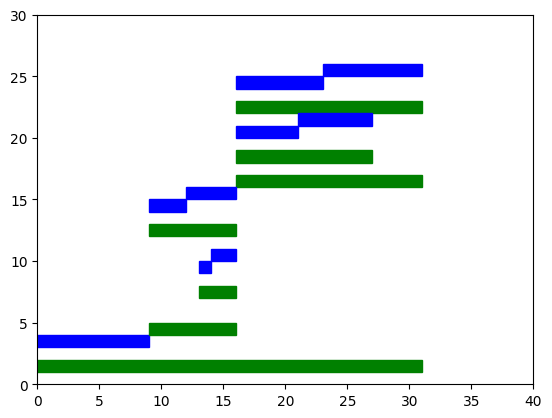

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from qubecalib.neopulseexp import Sequence, SubSequence, Slot, Series, Flushleft, Flushright, Branch

%matplotlib inline

fig = plt.figure()
ax = fig.gca()
for i, _ in seq._tree._nodes_items.items():
    if isinstance(_, Branch):
        print(f"{_.__class__.__name__}, {_.begin}, {_.duration}")
        ax.add_patch(patches.Rectangle(xy=(_.begin*1e9, i), width=_.duration*1e9, height=1, color='green'))
    if isinstance(_, Slot):
        ax.add_patch(patches.Rectangle(xy=(_.begin*1e9, i), width=_.duration*1e9, height=1, color='blue'))
ax.set_xlim(0,40)
ax.set_ylim(0,30)
plt.show()

In [2]:

[1,2,4] + [5,6]




[1, 2, 4, 5, 6]